# 🚂Prediction sell price of budozers using machine learning

in this notebook, we are going through example machine learning project with goal to predict sale price for bulldozers.

## Problem definition 
How well can we predict sale price of bulldozer, given its characteristics and previous examples.

## Data
The data is downloaded from Kaggle bluebook for bulldozers.
https://www.kaggle.com/datasets/farhanreynaldo/blue-book-for-bulldozer?resource=download

There are 3 main datasets:
Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## Evaluation
The evaluation metric for this competition is the RMSLE(root mean sequared log error) between the actual and predicted auction price.

## Features
Variable Description -SalesID unique identifier of a particular sale of a machine at auction -MachineID identifier for a particular machine; machines may have multiple sales -ModelID identifier for a unique machine model (i.e. fiModelDesc) -datasource source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs. -auctioneerID identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource. -YearMade year of manufacturer of the Machine -MachineHoursCurrentMeter current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale -UsageBand value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the ---fiBaseModel; e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel. -Saledate time of sale -Saleprice cost of sale in USD -fiModelDesc Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & -fiModelSeries & fiModelDescriptor -fiBaseModel disaggregation of fiModelDesc -fiSecondaryDesc disaggregation of fiModelDesc -fiModelSeries disaggregation of fiModelDesc -fiModelDescriptor disaggregation of fiModelDesc -ProductSize Don't know what this is -ProductClassDesc description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc -State US State in which sale occurred -ProductGroup identifier for top-level hierarchical grouping of fiModelDesc -ProductGroupDesc description of top-level hierarchical grouping of fiModelDesc -Drive_System machine configuration; typcially describes whether 2 or 4 wheel drive -Enclosure machine configuration - does machine have an enclosed cab or not -Forks machine configuration - attachment used for lifting -Pad_Type machine configuration - type of treads a crawler machine uses -Ride_Control machine configuration - optional feature on loaders to make the ride smoother -Stick machine configuration - type of control -Transmission machine configuration - describes type of transmission; typically automatic or manual -Turbocharged machine configuration - engine naturally aspirated or turbocharged -Blade_Extension machine configuration - extension of standard blade -Blade_Width machine configuration - width of blade -Enclosure_Type machine configuration - does machine have an enclosed cab or not -Engine_Horsepower machine configuration - engine horsepower rating -Hydraulics machine configuration - type of hydraulics -Pushblock machine configuration - option -Ripper machine configuration - implement attached to machine to till soil -Scarifier machine configuration - implement attached to machine to condition soil -Tip_control machine configuration - type of blade control -Tire_Size machine configuration - size of primary tires -Coupler machine configuration - type of implement interface -Coupler_System machine configuration - type of implement interface -Grouser_Tracks machine configuration - describes ground contact interface -Hydraulics_Flow machine configuration - normal or high flow hydraulic system -Track_Type machine configuration - type of treads a crawler machine uses -Undercarriage_Pad_Width machine configuration - width of crawler treads -Stick_Length machine configuration - length of machine digging implement -Thumb machine configuration - attachment used for grabbing -Pattern_Changer machine configuration - can adjust the operator control configuration to suit the user -Grouser_Type machine configuration - type of treads a crawler machine uses -Backhoe_Mounting machine configuration - optional interface used to add a backhoe attachment -Blade_Type machine configuration - describes type of blade -Travel_Controls machine configuration - describes operator control configuration -Differential_Type machine configuration - differential type, typically locking or standard -Steering_Controls machine configuration - describes operator control configuration 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [5]:
# import training and validation sets

df = pd.read_csv("Data/Train.csv",low_memory=False)

In [6]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [8]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

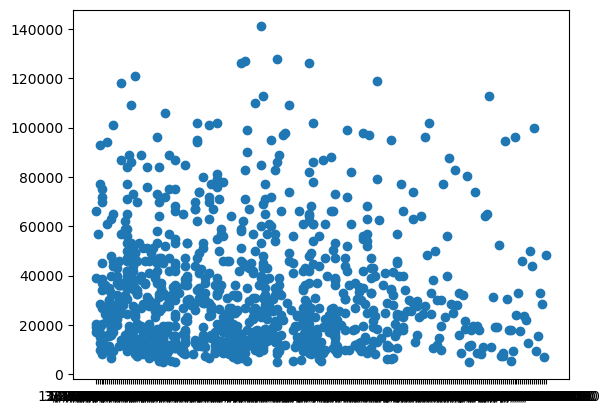

In [10]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

<Axes: ylabel='Frequency'>

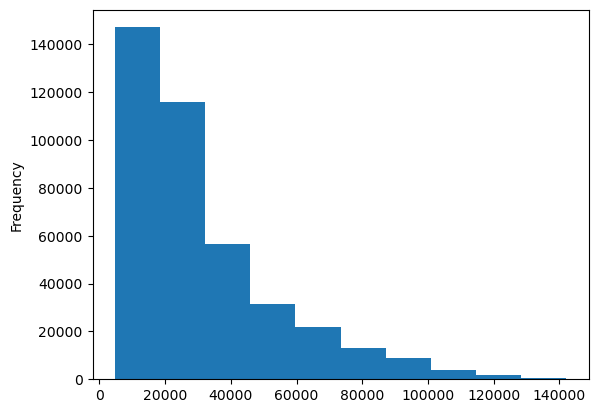

In [11]:
df.SalePrice.plot.hist()

In [12]:
# Parsing date
''' 
when we work with time series data, we want to enrich the time and date component as much as possible
'''

df = pd.read_csv("Data/Train.csv",low_memory=False,parse_dates=["saledate"])

In [13]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [14]:
df.saledate.dtype

dtype('<M8[ns]')

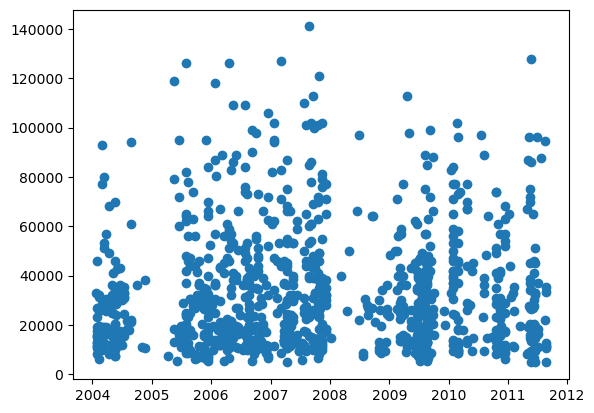

In [15]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [23]:
df.head().T

,205615,92803,98346,169297,274835
SalesID,1646770,1404019,1415646,1596358,1821514
SalePrice,9500,24000,35000,19000,14000
MachineID,1126363,1169900,1262088,1433229,1194089
ModelID,8434,7110,3357,8247,10150
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1975,1978,1980
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [18]:
# sort data frame by saledate

df.sort_values(by=["saledate"],inplace=True,ascending=True)

In [22]:
df.saledate.head(50)

205615   1989-01-17
92803    1989-01-31
98346    1989-01-31
169297   1989-01-31
274835   1989-01-31
75378    1989-01-31
81383    1989-01-31
134080   1989-01-31
55455    1989-01-31
55454    1989-01-31
114830   1989-01-31
54653    1989-01-31
238373   1989-01-31
98567    1989-01-31
113454   1989-01-31
92780    1989-01-31
113390   1989-01-31
127000   1989-01-31
92833    1989-01-31
32138    1989-01-31
205752   1989-01-31
113394   1989-01-31
77650    1989-01-31
127300   1989-01-31
82165    1989-01-31
140257   1989-01-31
134119   1989-01-31
115536   1989-01-31
76171    1989-01-31
63167    1989-01-31
63166    1989-01-31
127923   1989-01-31
169757   1989-01-31
116419   1989-01-31
231507   1989-01-31
212552   1989-01-31
62755    1989-01-31
144032   1989-01-31
28927    1989-01-31
67034    1989-01-31
233186   1989-01-31
127626   1989-01-31
78382    1989-01-31
78278    1989-01-31
141296   1989-01-31
66337    1989-01-31
127521   1989-01-31
86971    1989-01-31
144952   1989-01-31
92531    1989-01-31


In [25]:
# Make a copy of Data Frame

df_temp = df.copy()

In [26]:
df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98346,1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169297,1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
274835,1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393123,6260878,13500,1799594,4102,149,2.0,1000,NaN,NaN,2011-12-30,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
397987,6288376,9750,1872596,4875,149,2.0,1000,NaN,NaN,2011-12-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
392664,6258093,14500,1877553,3170,149,2.0,1988,NaN,NaN,2011-12-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400458,6315563,12500,1869637,26456,149,2.0,2010,NaN,NaN,2011-12-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [31]:
# feature engineering - Add datetime parameters for saldate column

df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayofWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayofYear"] = df_temp.saledate.dt.dayofyear

In [32]:
df_temp.head().T

,205615,92803,98346,169297,274835
SalesID,1646770,1404019,1415646,1596358,1821514
SalePrice,9500,24000,35000,19000,14000
MachineID,1126363,1169900,1262088,1433229,1194089
ModelID,8434,7110,3357,8247,10150
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1975,1978,1980
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [33]:
# Now we enriched our DataFrame with date time features, we can remove saledate column

df_temp.drop("saledate", axis=1, inplace=True)

In [39]:
# modelling

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=1, random_state=42)

model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

ValueError: could not convert string to float: 'Medium'

In [40]:
# convert string to categories

pd.api.types.is_string_dtype(df_temp["UsageBand"])

False

In [ ]:
# this will turn all string value into categories
for label, contents in df_temp.items():
    if pd.api.types.is_object_dtype(contents):
        df_temp[label] = contents.astype("category").cat.as_ordered()

In [52]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [53]:
df_temp.state.cat.codes

205615    43
92803      8
98346      8
169297     8
274835     8
          ..
393123    31
397987    31
392664    31
400458    31
400217    31
Length: 401125, dtype: int8

In [54]:
df_temp.head().T

,205615,92803,98346,169297,274835
SalesID,1646770,1404019,1415646,1596358,1821514
SalePrice,9500,24000,35000,19000,14000
MachineID,1126363,1169900,1262088,1433229,1194089
ModelID,8434,7110,3357,8247,10150
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1975,1978,1980
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,416,12G,644,A66


In [57]:
(df_temp.isnull().sum()/len(df_temp)) * 100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 5.019882
YearMade                     0.000000
MachineHoursCurrentMeter    64.408850
UsageBand                   82.639078
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.201558
fiModelSeries               85.812901
fiModelDescriptor           82.070676
ProductSize                 52.545964
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                73.982923
Enclosure                    0.081022
Forks                       52.115425
Pad_Type                    80.271985
Ride_Control                62.952696
Stick                       80.271985
Transmission                54.320972
Turbocharged

In [7]:
## save preprocessed dataframe

df_temp.to_csv("data/train_temp.csv",index=False)

NameError: name 'df_temp' is not defined

In [8]:
df_temp = pd.read_csv("data/train_temp.csv",low_memory=False)

In [11]:
df_temp.head().transpose()

,0,1,2,3,4
SalesID,1646770,1404019,1415646,1596358,1821514
SalePrice,9500,24000,35000,19000,14000
MachineID,1126363,1169900,1262088,1433229,1194089
ModelID,8434,7110,3357,8247,10150
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1975,1978,1980
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,416,12G,644,A66


In [12]:
df_temp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

In [9]:
# filling missing numeric value

for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [10]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).any():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [11]:
# fill numeric missing values with median

for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
           #add a binary column which tells us it data was missing
           df_temp[label+"_is_missing"] = pd.isnull(content)
           #fill missing numeric values with median
           df_temp[label] = content.fillna(content.median()) 
            

In [12]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
           print(label)

In [13]:
# turn categorical variables into numbers filling misssing  values
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add binary column to indicate sample has missing value
        df_temp[label+"_is_missing"] = pd.isnull(content)
        #Turn categories into numbers and add +1
        df_temp[label] = pd.Categorical(content).codes+1

In [14]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [32]:
%%time

#instantiate model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=1, random_state=42)

# Fit the model
model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])


CPU times: total: 26min 21s
Wall time: 28min 43s


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(2), int16(4), int64(11), int8(40)
memory usage: 75.7 MB


In [34]:
# score the model

model.score(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

0.9875209731205072

In [61]:
df_temp["saleYear"].value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [15]:
df_val = df_temp[df_temp.saleYear == 2011]
df_train = df_temp[df_temp.saleYear !=2011]

len(df_val),len(df_train)

(35197, 365928)

In [16]:
# split data into X and y

X_train , y_train = df_train.drop("SalePrice", axis=1) , df_train.SalePrice
X_val, y_val = df_val.drop("SalePrice", axis=1) , df_val.SalePrice

X_train.shape , y_train.shape , X_val.shape, y_val.shape

((365928, 102), (365928,), (35197, 102), (35197,))

In [17]:
# build evaluation function
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    #calculates root mean squared log error between prediction and true labels.
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# function to evaluate model on few different levels

def show_score(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores={"Training MAE" : mean_absolute_error(y_train,train_preds),
            "Valid MAE" : mean_absolute_error(y_val,val_preds),
            "Trainig RMSLE" : rmsle(y_train,train_preds),
            "Valid RMSLE" : rmsle(y_val,val_preds),
            "Training RSQR" : r2_score(y_train,train_preds),
            "valid RSQR" : r2_score(y_val,val_preds)}
    return scores

    

In [18]:
# Testing our model on a subset (to tune the hyperparameters)
from sklearn.ensemble import RandomForestRegressor

# change max_sample values
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
%time
model.fit(X_train,y_train)

CPU times: total: 0 ns
Wall time: 15.3 μs


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
show_score(model)

{'Training MAE': 5466.196100708336,
 'Valid MAE': 6887.866919339715,
 'Trainig RMSLE': np.float64(0.2559838076402365),
 'Valid RMSLE': np.float64(0.28626881763659495),
 'Training RSQR': 0.8628737214812484,
 'valid RSQR': 0.8179884804991473}

In [19]:
# Hyperparameter tuning with RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

#Different RandomForestRegressor hyperparameters

rf_grid={"n_estimators":np.arange(10,100,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_features":[0.5,1,"sqrt","auto"],
         "max_samples":[10000]}


rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,
                             verbose=True)
%time
rs_model.fit(X_train,y_train);

CPU times: total: 0 ns
Wall time: 7.87 μs
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [20]:
# find the best model hyperparameters

rs_model.best_params_

{'n_estimators': np.int64(10),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(1),
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 3}

In [19]:
# Train a model with best hyperparameters
'''
{'n_estimators': np.int64(40),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(17),
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 5}
 '''
from sklearn.ensemble import RandomForestRegressor

ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_split = 4,
                                    min_samples_leaf = 17,
                                    max_samples = None,
                                    max_features = 'sqrt',                        
                                    n_jobs=-1,
                                    random_state=42)

# fit the model
ideal_model.fit(X_train,y_train)

,n_estimators,40
,criterion,'squared_error'
,max_depth,None
,min_samples_split,4
,min_samples_leaf,17
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
show_score(ideal_model)

{'Training MAE': 6021.056310080899,
 'Valid MAE': 7342.6042808548555,
 'Trainig RMSLE': np.float64(0.2740564162513816),
 'Valid RMSLE': np.float64(0.3075277190272303),
 'Training RSQR': 0.8399335816101866,
 'valid RSQR': 0.8070128152624189}

In [21]:
# Make predictions on test data
import pandas as pd
# import test data
df_test = pd.read_csv("Data/Test.csv", low_memory=False,parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [22]:
# preprocessing test dataset (same format as train data)

def preprocess_data(df):
    
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofWeek"] = df.saledate.dt.dayofweek
    df["saleDayofYear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)

    # Fill numeric rows with madian
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
               #add a binary column which tells us it data was missing
               df[label+"_is_missing"] = pd.isnull(content)
               #fill missing numeric values with median
               df[label] = content.fillna(content.median()) 
            
        #Fill categorical missing data and turned into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # add binary column to indicate sample has missing value
            df[label+"_is_missing"] = pd.isnull(content)
            #Turn categories into numbers and add +1
            df[label] = pd.Categorical(content).codes+1

    return df
    

In [23]:
#Process test data
df_test = preprocess_data(df_test)
df_test.head().transpose()

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [24]:
# find column difference for different datasets

set(X_train.columns) -set(df_test.columns) 

{'auctioneerID_is_missing'}

In [25]:
# Manually adjust df_test to have "auctioneerID_is_missing" 
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [26]:
X_train.columns , df_test.columns

(Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
        'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
        'fiBaseModel',
        ...
        'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
        'Thumb_is_missing', 'Pattern_Changer_is_missing',
        'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
        'Blade_Type_is_missing', 'Travel_Controls_is_missing',
        'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
       dtype='object', length=102),
 Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
        'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
        'fiBaseModel',
        ...
        'Stick_Length_is_missing', 'Thumb_is_missing',
        'Pattern_Changer_is_missing', 'Grouser_Type_is_missing',
        'Backhoe_Mounting_is_missing', 'Blade_Type_is_missing',
        'Travel_Controls_is_missing', 'Differential_Type_is_missing',
        '

In [27]:
X_train.columns = X_train.columns.astype(str)
df_test.columns = X_train.columns

In [28]:
# Now test dataframe and training dataframe has same features, we can make predictions

test_preds = ideal_model.predict(df_test)
test_preds

array([22437.55549432, 24837.9709308 , 43657.91953248, ...,
       19658.73460407, 29159.16157098, 30672.2235798 ], shape=(12457,))

In [29]:
len(test_preds)

12457

In [30]:
# format prediction into format [saleID,sale_Price_prediction]

df_preds = pd.DataFrame()
df_preds["SaleID"] = df_test["SalesID"]
df_preds["sale_Price_prediction"] = test_preds
df_preds

,SaleID,sale_Price_prediction
0,1227829,22437.555494
1,1227844,24837.970931
2,1227847,43657.919532
3,1227848,40771.980804
4,1227863,39870.114167
...,...,...
12452,6643171,37880.288721
12453,6643173,28532.113844
12454,6643184,19658.734604
12455,6643186,29159.161571


In [72]:
# Export prediction data
df_preds.to_csv("Data/test_predictions.csv", index=False)

In [31]:
# feature importance

ideal_model.feature_importances_

array([2.65241801e-02, 2.63374512e-02, 6.10346756e-02, 3.69110940e-03,
       3.05990379e-03, 1.20241591e-01, 4.33659966e-03, 1.84173184e-03,
       5.56081674e-02, 4.07989360e-02, 7.22102381e-02, 1.04945690e-02,
       4.05079022e-02, 5.17111197e-02, 4.69763292e-02, 3.25705519e-03,
       1.27108505e-02, 1.34688080e-02, 3.30438322e-03, 6.08370223e-02,
       1.81330254e-03, 3.43491608e-03, 5.89399779e-03, 2.27939469e-03,
       1.57329980e-03, 7.33152259e-04, 3.93002662e-03, 1.33852719e-03,
       1.56885726e-03, 2.74070097e-03, 1.17722754e-02, 3.38564387e-03,
       1.11387678e-02, 7.87030698e-04, 9.14427073e-04, 1.08885330e-02,
       1.75523565e-03, 4.99002141e-03, 1.27035902e-02, 4.91740391e-03,
       4.62148561e-03, 5.13791176e-03, 3.76749376e-03, 1.95818503e-03,
       2.59430288e-03, 8.68535978e-04, 6.47302584e-04, 5.65976457e-03,
       5.93328222e-03, 5.16424048e-04, 8.06126654e-04, 3.27531690e-02,
       2.55691555e-03, 2.25304242e-03, 1.66275290e-03, 4.17329300e-03,
      

In [32]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)